In [1]:
import os
os.chdir('../..')
!ls

future_trade


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pyomo.environ import *
# from pyomo.mpec import *
import math
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# from future_trade.spatial_trade_model.functions_general import *
# from future_trade.spatial_trade_model.functions_calibration import *
# from pathos.multiprocessing import ProcessPool, cpu_count

In [4]:
data_dir = '../../OPSIS/Data/Trade_clearance_model'
calibration_output = f'{data_dir}/Output/Calibration/'

In [674]:
for crop_code in [
    'jwhea', 'jrice', 'jmaiz', 'jsoyb', 'jbarl', 'jcass', 'jvege', 
    'jbana', 'jbean', 'jgrnd', 'jrpsd', 'jpalm', 'jsugc'
    # 'jmill', 'jsorg', 
    # 'jocer', 'jpota', 'jyams', 'jswpt', 'jorat', 
    # 'jplnt', 'jsubf', 'jtemf', 
    # 'jchkp', 'jcowp', 'jlent', 'jpigp', 'jopul', 
    # 'jothr', 'jsnfl', 'jtols',
    # 'jsugb'
    ]:
    print(crop_code)
    df_country = pd.read_csv(f'{data_dir}/Input/Country_data/country_information_'+str(crop_code)+'.csv')
    df_bil = pd.read_csv(f'{data_dir}/Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')
    
    trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
    trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
    trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

    calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
    calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

    tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
    tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

    conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
    conprice.columns = ['abbreviation', 'conprice']

    prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
    prodprice.columns = ['abbreviation', 'prodprice']
    
    print(f'rows in calibrated trade: {trade_cal.shape}')

    df_bil = df_bil.merge(trade_cal)
    print(f"accuracy: {len(df_bil[(df_bil['trade_cal']>1)==(df_bil['q_calib']>1)])/(len(df_bil))}")
    print(f"precision: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['trade_cal']>1)])}")
    print(f"recall: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['q_calib']>1)])}")
    print(f"r2 linear: {r2_score(df_bil['q_calib'], df_bil['trade_cal'])}")
    print(f"r2 log: {r2_score(np.log(df_bil['q_calib']+1), np.log(df_bil['trade_cal']+1))}")
    print(f"r2 linear excl dom sup: {r2_score(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'])}")
    print(f"r2 log excl dom sup: {r2_score(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']+1))}")
    print(f"rmse: {np.sqrt(mean_squared_error(df_bil['q_calib'], df_bil['trade_cal']))}")

jwhea
rows in calibrated trade: (23409, 3)
accuracy: 0.90319962407621
precision: 0.8671273445212241
recall: 0.7338345864661654
r2 linear: 0.9999990564774628
r2 log: 0.7265731784570998
r2 linear excl dom sup: 0.9998860477784629
r2 log excl dom sup: 0.714051146749751
rmse: 1184.5175669216483
jrice
rows in calibrated trade: (23409, 3)
accuracy: 0.897518048613781
precision: 0.9290917921321029
recall: 0.45919347095535284
r2 linear: 0.999999358697712
r2 log: 0.6687604105610309
r2 linear excl dom sup: 0.9990427701582278
r2 log excl dom sup: 0.6355702433455449
rmse: 1041.4764159822096
jmaiz
rows in calibrated trade: (23409, 3)
accuracy: 0.8902131658763723
precision: 0.8556990454800674
recall: 0.5971786833855799
r2 linear: 0.9999998526827631
r2 log: 0.6944157185866422
r2 linear excl dom sup: 0.9999881557498888
r2 log excl dom sup: 0.6549089141952693
rmse: 1034.2555816635738
jsoyb
rows in calibrated trade: (23409, 3)
accuracy: 0.8904267589388697
precision: 0.7220949263502455
recall: 0.5624681285

In [675]:
crop_code = 'jsoyb'

In [676]:
df_country = pd.read_csv(f'{data_dir}/Input/Country_data/country_information_'+str(crop_code)+'.csv')
df_bil = pd.read_csv(f'{data_dir}/Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')

trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
conprice.columns = ['abbreviation', 'conprice']

prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
prodprice.columns = ['abbreviation', 'prodprice']

In [677]:
calib.describe()

,calib
count,23409.000000
mean,1.068598
std,8.370138
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,260.016400


In [678]:
tc.describe()

,tc
count,23409.000000
mean,183.826840
std,77.259199
min,2.858634
25%,130.286264
50%,163.322835
75%,216.655179
max,627.995265


In [679]:
conprice.describe()

,conprice
count,153.000000
mean,793.799596
std,98.280732
min,661.003398
25%,740.932386
50%,781.302515
75%,818.271469
max,1529.671625


In [680]:
prodprice.describe()

,prodprice
count,153.000000
mean,679.189096
std,299.502812
min,456.271331
25%,545.039266
50%,591.931473
75%,684.535949
max,2672.322170


In [681]:
calib.sort_values('calib').tail(100)

,from_abbreviation,to_abbreviation,calib
22138,USA,PAN,59.651908
22176,USA,USA,61.457375
2799,BRA,FNP,62.948767
18788,SLE,SLE,63.437731
4312,COD,COD,63.581278
...,...,...,...
17058,PRK,KOR,232.797918
14304,NAM,KOR,238.670386
12468,LSO,KOR,240.732203
19812,SWZ,KOR,248.069311


In [682]:
df_bil[['trade_USD_t']].describe()

,trade_USD_t
count,23409.000000
mean,183.758234
std,77.650741
min,14.341609
25%,130.374042
50%,163.422440
75%,216.839276
max,628.776698


In [683]:
df_country['prod_price_USD_t'].describe()

count     153.000000
mean      705.875259
std       394.828940
min       291.800000
25%       491.033333
50%       596.411327
75%       832.109265
max      2826.057810
Name: prod_price_USD_t, dtype: float64

In [684]:
d = df_bil[['from_abbreviation', 'to_abbreviation', 'trade_USD_t']].merge(tc)
r2_score(d['trade_USD_t'], d['tc'])

0.9854105155421863

In [685]:
np.sqrt(mean_squared_error(d['trade_USD_t'], d['tc']))

np.float64(9.378994910636075)

In [686]:
d = df_country[['abbreviation', 'prod_price_USD_t']].merge(prodprice)
r2_score(d['prod_price_USD_t'], d['prodprice'])

0.8394409127157413

In [687]:
np.sqrt(mean_squared_error(d['prod_price_USD_t'], d['prodprice']))

np.float64(157.68940019793675)

In [688]:
df_bil = df_bil.merge(trade_cal)

In [689]:
df_bil[['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,2.340900e+04,2.340900e+04
mean,1.506808e+04,1.511755e+04
std,7.007978e+05,7.007972e+05
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00
50%,2.714294e-06,1.000000e+00
75%,6.119914e-02,1.000000e+00
max,6.083563e+07,6.083563e+07


In [690]:
df_bil[['q_calib', 'trade_cal']].sum()

q_calib      3.527286e+08
trade_cal    3.538868e+08
dtype: float64

In [691]:
df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']][['q_calib', 'trade_cal']].sum()

q_calib      1.638335e+08
trade_cal    1.647063e+08
dtype: float64

In [692]:
df_bil[df_bil['q_calib']>1].shape

(3922, 10)

In [693]:
df_bil[df_bil['trade_cal']>1].shape

(3055, 10)

In [694]:
# false positives
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,8.490000e+02,849.000000
mean,7.967003e-02,1155.488810
std,1.967387e-01,3267.483736
min,0.000000e+00,2.000000
25%,0.000000e+00,53.000000
50%,2.825791e-12,395.000000
75%,1.543244e-02,1108.000000
max,9.972435e-01,37956.000000


In [695]:
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)].sort_values('trade_cal').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,trade_USD_t,adv,q_calib,trade_relationship,q_old,trade_relationship_old,trade_cal
3135,BWA,KOR,jsoyb,234.063057,0.0,0.000000,0,0.000000,0,34700.0
17058,PRK,KOR,jsoyb,48.896071,0.0,0.000002,0,0.017946,0,35619.0
14304,NAM,KOR,jsoyb,180.758198,0.0,0.000000,0,0.000000,0,36518.0
12468,LSO,KOR,jsoyb,169.052104,0.0,0.000000,0,0.000000,0,36833.0
19812,SWZ,KOR,jsoyb,129.831779,0.0,0.000000,0,0.000000,0,37956.0


In [696]:
# false negatives
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,1716.000000,1716.0
mean,190.462845,1.0
std,1271.936758,0.0
min,1.000865,1.0
25%,2.362738,1.0
50%,7.399289,1.0
75%,35.605216,1.0
max,38313.072215,1.0


In [697]:
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)].sort_values('q_calib').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,trade_USD_t,adv,q_calib,trade_relationship,q_old,trade_relationship_old,trade_cal
3747,CHM,KOR,jsoyb,114.130986,1.409075,9352.467254,1,6862.238887,1,1.0
21940,URY,IND,jsoyb,134.057212,0.345000,9882.721104,1,2098.301965,1,1.0
17422,PRY,THA,jsoyb,185.631844,0.837857,11263.501269,1,9890.343245,1,1.0
17809,RUS,IND,jsoyb,173.873791,0.350000,18852.197990,1,10.897915,1,1.0
3499,CAN,THA,jsoyb,243.319035,0.837857,38313.072215,1,49210.354280,1,1.0


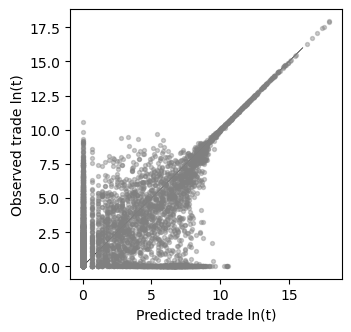

In [698]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil['trade_cal']), np.log(df_bil['q_calib']+1), s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

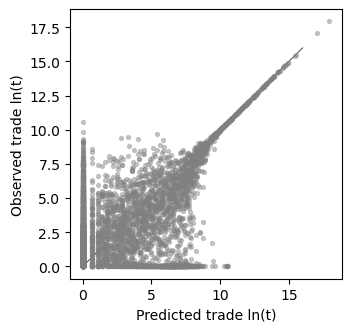

In [699]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']), 
            np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

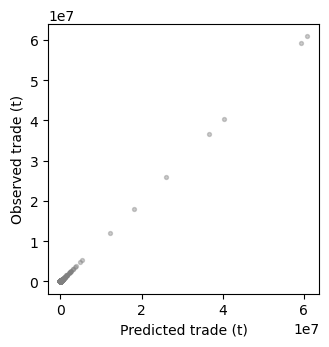

In [700]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil['trade_cal'], df_bil['q_calib'], s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

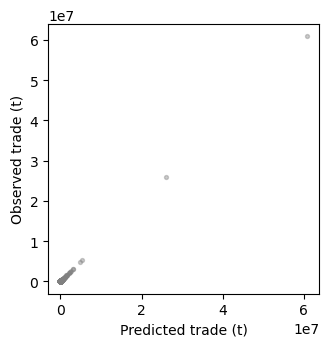

In [701]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'], 
            df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

In [702]:
# demand
demand = df_bil.groupby(['to_abbreviation'])[['q_calib', 'trade_cal']].sum().reset_index()
r2_score(demand['q_calib'], demand['trade_cal'])

0.9999971868495324

In [703]:
r2_score(np.log(demand['q_calib']+1), np.log(demand['trade_cal']+1))

0.6504405595019196

In [704]:
demand['diff'] = np.abs(demand['q_calib'] - demand['trade_cal'])
demand['perc_diff'] = np.abs(demand['q_calib'] - demand['trade_cal']) / demand['q_calib']
demand.sort_values('diff').tail(20)

,to_abbreviation,q_calib,trade_cal,diff,perc_diff
50,GIN,1.635903e+03,18245.0,16609.097336,1.015286e+01
29,COG,5.789184e+02,17300.0,16721.081587,2.888331e+01
131,TCD,7.646456e-01,16865.0,16864.235354,2.205497e+04
121,SLB,1.739115e+03,18619.0,16879.885032,9.706020e+00
21,CAF,2.410190e+01,16940.0,16915.898097,7.018491e+02
78,LBR,3.005362e+03,19942.0,16936.638424,5.635474e+00
148,VUT,8.525195e+01,17528.0,17442.748051,2.046023e+02
37,DJI,8.084860e-03,17669.0,17668.991915,2.185442e+06
119,SDN,3.800387e+00,17762.0,17758.199613,4.672735e+03
51,GMB,2.583919e+02,18073.0,17814.608088,6.894414e+01


In [705]:
# supply
supply = df_bil.groupby(['from_abbreviation'])[['q_calib', 'trade_cal']].sum().reset_index()
r2_score(supply['q_calib'], supply['trade_cal'])

0.9999986501927912

In [706]:
r2_score(np.log(supply['q_calib']+1), np.log(supply['trade_cal']+1))

0.19632617873096603

In [707]:
supply['diff'] = np.abs(supply['q_calib'] - supply['trade_cal'])
supply['perc_diff'] = np.abs(supply['q_calib'] - supply['trade_cal']) / supply['q_calib']
supply.sort_values('diff').tail(20)

,from_abbreviation,q_calib,trade_cal,diff,perc_diff
123,SLV,5.284692e+03,30566.0,25281.308033,4.783875
109,PNG,0.000000e+00,25707.0,25707.000000,inf
144,USA,1.139289e+08,113954843.0,25970.638789,0.000228
33,CUB,4.000000e+02,27222.0,26822.000000,67.055000
148,VUT,0.000000e+00,27614.0,27614.000000,inf
121,SLB,0.000000e+00,27967.0,27967.000000,inf
56,HND,2.191458e+03,30214.0,28022.542147,12.787169
116,RUS,4.691483e+06,4663460.0,28023.022323,0.005973
27,CMR,8.542646e+04,113832.0,28405.544207,0.332515
105,PAK,6.020000e+01,29154.0,29093.800000,483.285716
